In [1]:
#import libarry
import pandas as pd
import numpy as np 
import matplotlib.pyplot as  plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("../data/college.csv")
df.head()

,StudentID,Gender,Parent_income,IQ,Encourage,Plan
0,4558,male,53900,118,encourage,plan
1,4561,female,24900,87,not encourage,not plan
2,4563,female,65800,93,not encourage,not plan
3,4565,male,11440,117,encourage,plan
4,4567,female,16700,102,not encourage,not plan


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   StudentID      8000 non-null   int64 
 1   Gender         8000 non-null   object
 2   Parent_income  8000 non-null   int64 
 3   IQ             8000 non-null   int64 
 4   Encourage      8000 non-null   object
 5   Plan           8000 non-null   object
dtypes: int64(3), object(3)
memory usage: 375.1+ KB


In [4]:
#mising value
df.isnull().sum()

StudentID        0
Gender           0
Parent_income    0
IQ               0
Encourage        0
Plan             0
dtype: int64

In [6]:
#cek duflicate
df.duplicated().sum()

np.int64(0)

In [7]:
#hapus data duplicat 
df = df.drop_duplicates()

In [8]:
df.duplicated().sum()

np.int64(0)

In [44]:
df = df.rename(columns={
    'StudentID':'Student_ID'
})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Student_ID     8000 non-null   int64 
 1   Gender         8000 non-null   int8  
 2   Parent_income  8000 non-null   int64 
 3   IQ             8000 non-null   int64 
 4   Encourage      8000 non-null   int8  
 5   Plan           8000 non-null   object
 6   encourage      8000 non-null   int8  
dtypes: int64(3), int8(3), object(1)
memory usage: 273.6+ KB


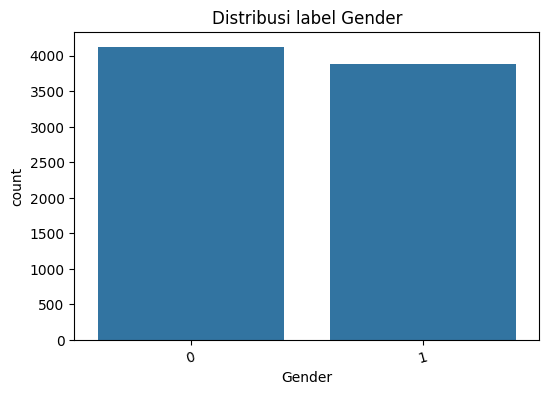

In [45]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df)
plt.title('Distribusi label Gender')
plt.xticks(rotation=15)
plt.show()

In [46]:
# mapping label -> kode untuk target
Gender_cat = df['Gender'].astype('category')
Gender_classes = list(Gender_cat.cat.categories) #urutan kelas
df['Gender'] = Gender_cat.cat.codes #y numerik

# fitur kategoriakal lain (Gender, Plan) ->kode juga
for col in ['Gender','plan']:
    if col in df.columns:
        df[col] = df[col].astype('category').cat.codes


df.head()

,Student_ID,Gender,Parent_income,IQ,Encourage,Plan,encourage
0,4558,1,53900,118,1,plan,0
1,4561,0,24900,87,0,not plan,1
2,4563,0,65800,93,0,not plan,1
3,4565,1,11440,117,1,plan,0
4,4567,0,16700,102,0,not plan,1


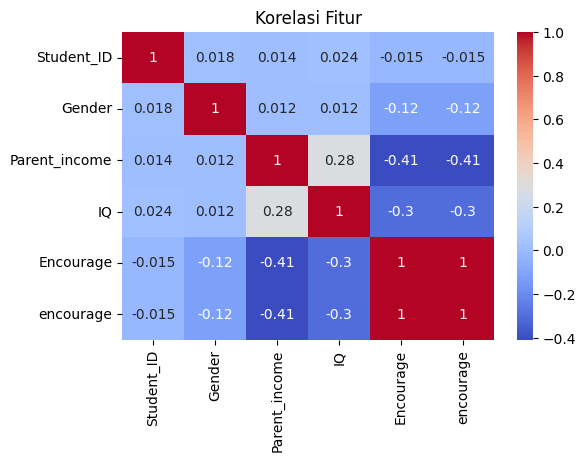

In [36]:
#korelasi
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur')
plt.show()


In [47]:
# mapping label -> kode untuk target
Encourage_cat = df['Encourage'].astype('category')

# Mengganti nilai variabel 'Encourage' dengan kode numerik
df['Encourage'] = Encourage_cat.cat.codes

# fitur kategoriakal lain (Gender) -> kode juga
for col in ['Gender']:
    if col in df.columns:
        df[col] = df[col].astype('category').cat.codes

df.head()

,Student_ID,Gender,Parent_income,IQ,Encourage,Plan,encourage
0,4558,1,53900,118,1,plan,0
1,4561,0,24900,87,0,not plan,1
2,4563,0,65800,93,0,not plan,1
3,4565,1,11440,117,1,plan,0
4,4567,0,16700,102,0,not plan,1
